In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Bisection

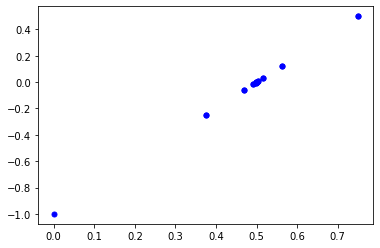

In [2]:
## Root finding by bi-section
f = lambda x, a: a*x - 1
a = 2
x1 = 0;
x2 = 1.5;
x = np.stack([x1, x2])
eps = 1e-3
err = max(abs(x[0]-x[1]),abs(f(x[0],a)-f(x[1],a)))
xs = []
fs = []
while (err > eps) and (f(x[0], a) * f(x[1], a) <= 0):
    x0 = x
    x = np.stack([x0[0], 0.5 * (x0[0] + x0[1])])
    if (f(x[0], a) * f(x[1], a)) > 0:
        x = np.stack([0.5 *( x0[0] + x0[1]), x0[1]])
    
    err = max(abs(x[0]-x[1]),abs(f(x[0],a)-f(x[1],a)))
    xs.append(x)
    fs.append(f(x, a))
    
plt.plot(xs, fs, '.b', markersize=10);

## Cube

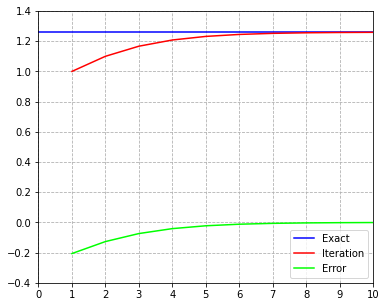

In [3]:
# f(x) = x**3 - a - 0
# g(x) = x + C*(x**3 - a)
a = 2
n = 10
g = 1.
C = -0.1

sq = np.zeros(n)
sq[0] = g
for i in range(1, n):
    sq[i] = C * (sq[i - 1] ** 3 - a) + sq[i - 1]
plt.figure(figsize=(6, 5))
plt.plot([0, n], [a**(1./3.), a**(1./3.)], 'b', label='Exact')
plt.plot(np.arange(1, n + 1), sq, 'r', label='Iteration')
plt.plot(np.arange(1, n + 1), (sq - a ** (1. / 3.)) / (a ** (1. / 3.)), 'lime', label='Error')
plt.grid(linestyle='--')
plt.xlim(0, 10)
plt.xticks(np.arange(11))
plt.ylim(-0.4, 1.4)
plt.legend();